<a href="https://colab.research.google.com/github/AnnLivio/powerbi/blob/main/Pizza_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Everybody loves Pizza 🍕
## Pizza Sales Analysis

### **Orders** Table

|Field|Description|
|---|---|
|order\_id|Unique identifier|
|date|Date the order was placed|
|time|Time the order was placed|


---

### **Order details** Table

* **order\_details\_id:** Unique identifier for each pizza
* **order\_id:** Foreign key that ties the details in each order to the order itself
* **pizza\_id:** Foreign key that ties the pizza ordered to its details, like size and price
* **quantity:** Quantity ordered for each pizza of the same type and size|

---

### **Pizza** Table
* **pizza\_id:** Unique identifier for each pizza \(constituted by its type and size\)
* **pizza\_type\_id:** Foreign key that ties each pizza to its broader pizza type
* **size:** Size of the pizza \(Small, Medium, Large, X Large, or XX Large\)
* **price:** Price of the pizza in USD


---

### **Pizza_type** Table

* **pizza_type_id**: Unique identifier for each pizza type
* **name:** Name of the pizza as shown in the menu
* **category:** Category in the menu (Classic, Chicken, Supreme, or Veggie)
* **ingredients:** Comma-delimited ingredients as shown in the menu

## Import libraries

In [ ]:
import pandas as pd
import numpy as np

# Data visualitation
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path_dict = {'orders': 'orders.csv',
             'order_details': 'order_details.csv',
             'pizzas': 'pizzas.csv',
             'pizza_types': 'pizza_types.csv'}
for key, value in path_dict.items():
  exec(f'{key} = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Simple_Projects/pizza_sales/{value}", encoding="latin-1")')
  print(eval(f'{key}.shape'))



(21350, 3)
(48620, 4)
(96, 4)
(32, 4)


# Orders and Order_details tables

In [ ]:
print("Duplicated data: ", orders.duplicated().sum())
orders.info()

Duplicated data:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [ ]:
print("Duplicated data: ", order_details.duplicated().sum())
order_details.info()

Duplicated data:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


# Pizzas tables

In [ ]:
print("Duplicated data: ", pizzas.duplicated().sum())
pizzas.info()

Duplicated data:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [ ]:
print("Duplicated data: ", pizza_types.duplicated().sum())
pizza_types.info()

Duplicated data:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [ ]:
# Convert `date` column in datetime
orders['date'] = pd.to_datetime(orders['date'])

# Create column month
orders['month'] = orders['date'].dt.month

#Create column weekday
orders['weekday'] = orders['date'].dt.weekday

In [ ]:
orders.agg({'date':['min', 'max']})

,date
min,2015-01-01
max,2015-12-31


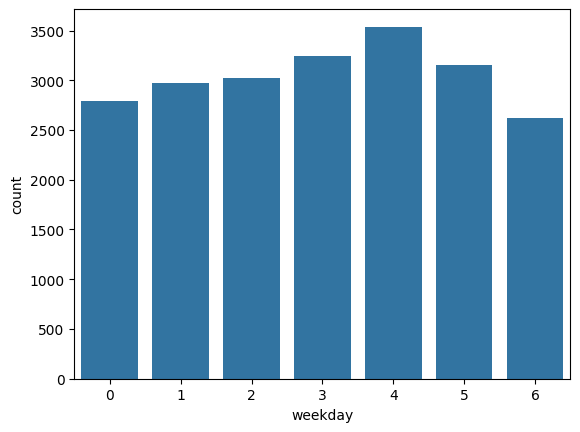

In [ ]:
# Sales per weekday
sales_by_weekday = orders['weekday'].value_counts().reset_index()
sns.barplot(x='weekday', y='count', data=sales_by_weekday)
plt.show()

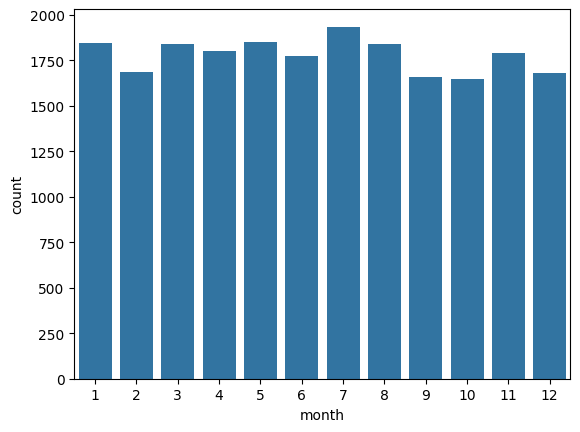

In [ ]:
# Sales count per month
sales_by_month = orders['month'].value_counts().reset_index()
sns.barplot(x='month', y='count', data=sales_by_month)
plt.show()

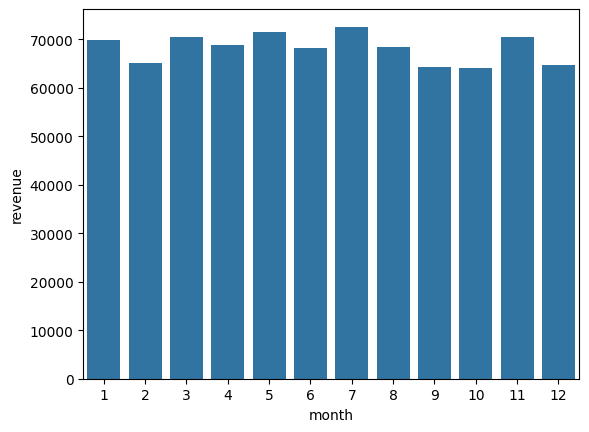

In [ ]:
month_revenue = orders.merge(order_details.groupby('order_id').agg({'revenue':'sum'}).reset_index(), on='order_id').groupby('month')['revenue'].sum().reset_index()
sns.barplot(x='month', y='revenue', data=month_revenue)
plt.show()

In [ ]:
# Sales count per month
sales_by_month = sales_by_month.merge(month_revenue, on='month')
sales_by_month

,month,count,revenue
0,7,1935,72557.90
1,5,1853,71402.75
2,1,1845,69793.30
3,8,1841,68278.25
4,3,1840,70397.10
5,4,1799,68736.80
6,11,1792,70395.35
7,6,1773,68230.20
8,2,1685,65159.60
9,12,1680,64701.15


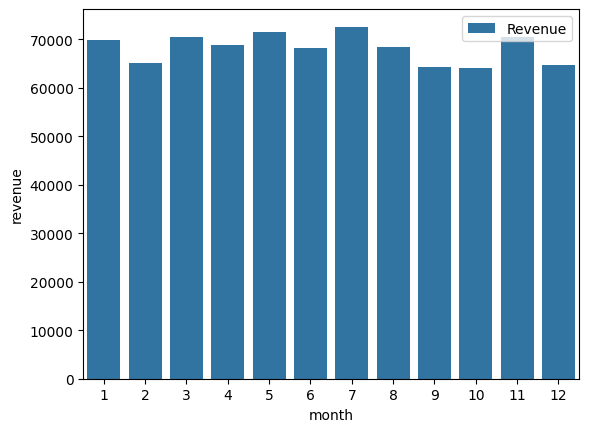

In [ ]:
sns.barplot(x='month', y='revenue', data=sales_by_month, label='Revenue')
plt.show()

### Create revenue column in order_details table

In [ ]:
pizzas_full = pizzas.merge(pizza_types[['pizza_type_id', 'name', 'category']], on='pizza_type_id')
pizzas_full.head()

,pizza_id,pizza_type_id,size,price,name,category
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken
1,bbq_ckn_m,bbq_ckn,M,16.75,The Barbecue Chicken Pizza,Chicken
2,bbq_ckn_l,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken
3,cali_ckn_s,cali_ckn,S,12.75,The California Chicken Pizza,Chicken
4,cali_ckn_m,cali_ckn,M,16.75,The California Chicken Pizza,Chicken


In [ ]:
order_details = order_details.merge(pizzas_full[['pizza_id','price', 'category']], on='pizza_id')
order_details['revenue'] = order_details['quantity'] * order_details['price']
order_details.head()

,order_details_id,order_id,pizza_id,quantity,price,category,revenue
0,1,1,hawaiian_m,1,13.25,Classic,13.25
1,2,2,classic_dlx_m,1,16.00,Classic,16.00
2,3,2,five_cheese_l,1,18.50,Veggie,18.50
3,4,2,ital_supr_l,1,20.75,Supreme,20.75
4,5,2,mexicana_m,1,16.00,Veggie,16.00


## Categorías más vendidas

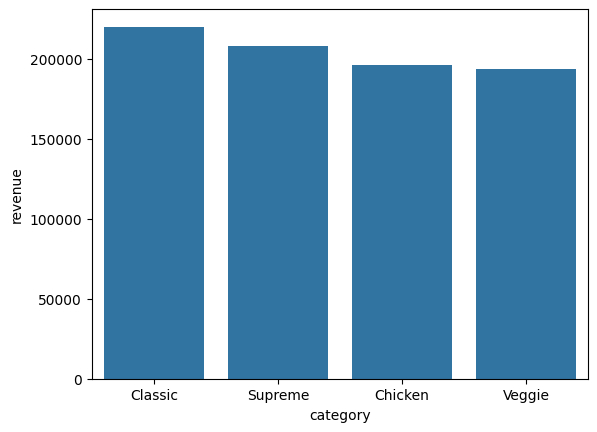

In [ ]:
category_revenue = order_details.groupby('category').agg({'revenue':'sum'}).sort_values('revenue', ascending=False)
sns.barplot(x=category_revenue.index, y='revenue', data=category_revenue)
plt.show()

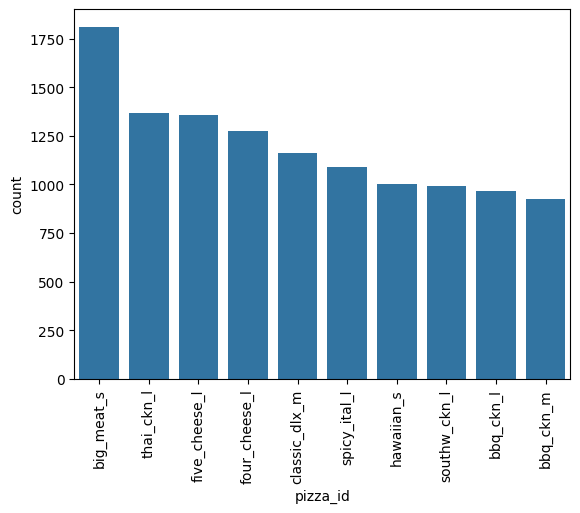

In [ ]:
# Top ten ordered pizzas
top_ten_pizzas = order_details['pizza_id'].value_counts().head(10).reset_index()
sns.barplot(x='pizza_id', y='count', data=top_ten_pizzas)
plt.xticks(rotation=90)
plt.show()

In [ ]:
top_pizzas = order_details.groupby('pizza_id').agg({'quantity':'sum'}).sort_values('quantity', ascending=False).reset_index()
top_pizzas = top_pizzas.merge(pizzas, on='pizza_id')
top_pizzas = top_pizzas.merge(pizza_types[['pizza_type_id', 'name', 'category']], on='pizza_type_id')


#top_ten = top_pizzas.groupby('pizza_type_id').agg({'quantity':'sum'}).sort_values('quantity', ascending=False).reset_index()


In [ ]:
pizza_types.query('pizza_type_id == "classic_dlx"')

,pizza_type_id,name,category,ingredients
7,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."


In [ ]:
top_ten = top_pizzas.groupby('name').agg({'quantity':'sum'}).sort_values('quantity', ascending=False).reset_index()

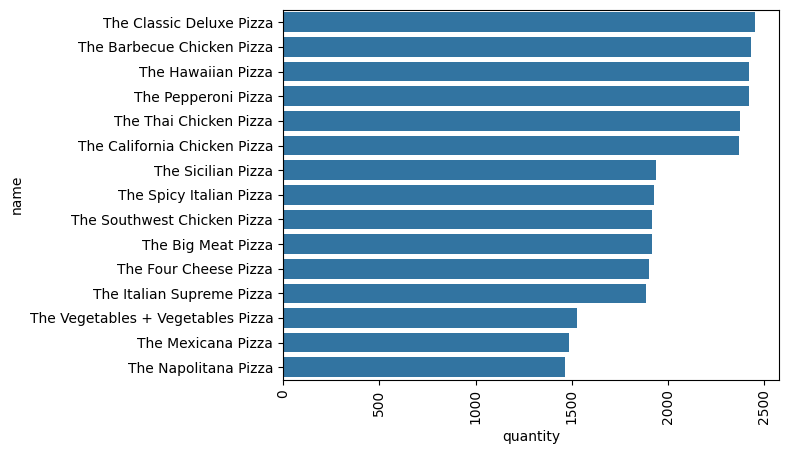

In [ ]:
# Top 10 pizzas most sale
sns.barplot(y='name', x='quantity', data=top_ten.iloc[:15,])
plt.xticks(rotation=90)
plt.show()